# Projet 3 - Analyse exploratoire

## Import et initialisation

In [1]:
%load_ext pep8magic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
from random import sample
from scipy import stats

%matplotlib inline

plt.style.use('seaborn-notebook')
sns.set_style('ticks')
sns.set(rc={'figure.figsize': (12, 8)})
sns.set(rc={'font.size': 24})

os.getcwd()
os.chdir("C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project")

In [3]:
def DistriPlot(Var, X):
    sns.distplot(Var)
    plt.xlabel(X, fontsize=18)
    plt.ylabel("Distribution", fontsize=18)
    plt.title("Distribution de " + X, fontsize=24)
    print("La médiane de ", X, "est de ", Var.median())
    print("La moyenne de ", X, "est de ", Var.mean())


def BoxPlot1D(X, title):
    sns.boxplot(X)
    plt.title(title, fontsize=24)
    print(X.describe())

In [4]:
data = pd.read_excel("Online Retail.xlsx")

In [5]:
print(data.columns)
data.describe()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [6]:
# Create a random index
randomIndex = np.array(sample(range(len(data)), 5))

# Get 5 random rows
Sample = data.loc[randomIndex]

# Print the sample
print(Sample)

       InvoiceNo StockCode                          Description  Quantity  \
413022    572304     21624          VINTAGE UNION JACK DOORSTOP         2   
62478    C541501     85118                 HEART T-LIGHT HOLDER        -7   
223634    556486     21634        ASSORTED MINI MADRAS NOTEBOOK        24   
279622    561352     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        18   
322277    565231     23078             ICE CREAM PEN LIP GLOSS         13   

               InvoiceDate  UnitPrice  CustomerID         Country  
413022 2011-10-23 15:07:00       5.95     17131.0  United Kingdom  
62478  2011-01-18 15:26:00       1.25     13458.0  United Kingdom  
223634 2011-06-12 13:22:00       0.39     17422.0  United Kingdom  
279622 2011-07-26 14:41:00       2.95     18094.0  United Kingdom  
322277 2011-09-02 09:26:00       2.46         NaN  United Kingdom  


#### Analyse des valeurs manquantes 

In [7]:
def EvaluateCompletnessCOL(Col):
    "Définition de la fonction de calcul du taux de complétion d'une colonne"
    IsNull = pd.isnull(Col)
    Empty = IsNull.sum()/Col.size
    if Empty == 1:
        (float(0))
    else:
        return (float(1 - Empty))


def EvaluateCompletnessDF(data):
    "Création de la fonction pour évaluer la complétion d'un jeu de données"
    IsNull = pd.isnull(data)
    EmptynessRatio = IsNull.sum().sum()/data.size
    return (print("La matrice est complète à :",
                  np.around((1-EmptynessRatio), decimals=3)*100, "%"))

In [8]:
EvaluateCompletnessDF(data)

La matrice est complète à : 96.89999999999999 %


In [9]:
# Suppression des doublons

In [10]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(541909, 8)
(536641, 8)


In [11]:
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
print(data.CustomerID.nunique())
print(data.InvoiceNo.nunique())

4372
25900


In [13]:
# Il y a donc 4372 clients différents

L'étude porte sur l'analyse du comportement des clients, donc si une transaction ne peut etre reliée à un client, on la supprime

In [14]:
# Suppression des lignes où la valeur 'CustomerID' est manquante
print(data.shape)
data = data.dropna(subset=['CustomerID'])
print(data.shape)

(536641, 8)
(401604, 8)


In [15]:
EvaluateCompletnessDF(data)

La matrice est complète à : 100.0 %


La matrice est complète, il n'y a donc pas besoin de traitement des valeurs manquantes 

### analyse des pays 

In [16]:
data.Country.unique()
customer_country = data[['Country', 'CustomerID']].drop_duplicates()
CC = customer_country.groupby(['Country'])['CustomerID'].aggregate('count')
# CC.reset_index().sort_values('CustomerID', ascending=False)

La médiane de  Quantity est de  5.0
La moyenne de  Quantity est de  12.183272576966365


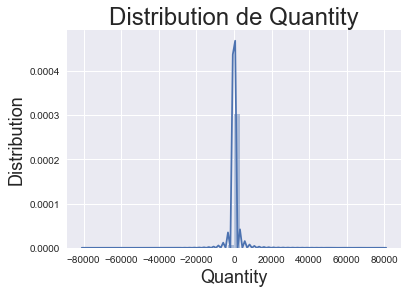

In [17]:
data.Quantity.describe()
DistriPlot(data.Quantity, "Quantity")

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


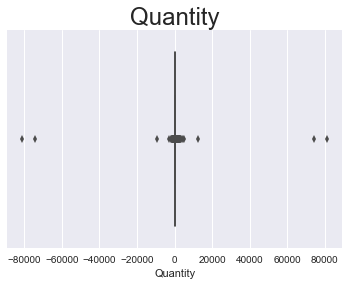

In [18]:
BoxPlot1D(data.Quantity, 'Quantity')

La médiane de  Unit Price est de  1.95
La moyenne de  Unit Price est de  3.47406363979831


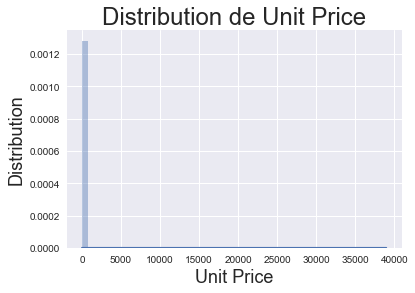

In [19]:
DistriPlot(data.UnitPrice, "Unit Price")

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64


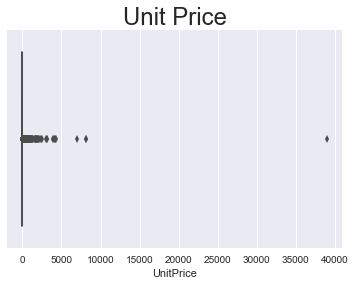

In [20]:
BoxPlot1D(data.UnitPrice, 'Unit Price')

Traitement des valeurs aberrantes (Quantité et prix négatifs)

In [21]:
print(data.shape)
data = data[(data['Quantity'] > 0)]
data.shape

(401604, 8)


(392732, 8)

In [22]:
data = data[(data['UnitPrice'] > 0)]
data.shape

(392692, 8)

Traitement sur les dates 

In [23]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [24]:
import datetime as dt
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

 On définit l'ancienneté de l'achat par rapport à J+1 de la dernière date d'achat recensée sur le data set 

In [25]:
NOW = dt.datetime(2011, 12, 10)

In [26]:
print(data.shape)
data.head()

(392692, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [27]:
def unique_counts(df1):
    "Le nombre de valeurs uniques pour chaque colonnes"
    for i in df1.columns:
        count = df1[i].nunique()
        print(i, ": ", count)


unique_counts(data)

InvoiceNo :  18532
StockCode :  3665
Description :  3877
Quantity :  301
InvoiceDate :  17282
UnitPrice :  440
CustomerID :  4338
Country :  37


In [28]:
data.groupby('CustomerID')['InvoiceNo'].value_counts().mean()

21.189941722426074

In [29]:
mean_inv_by_cust = (data.InvoiceNo.nunique()) / (data.CustomerID.nunique())
print(round(mean_inv_by_cust, 1))

4.3


Un client a effectué en moyenne 4.3 achats différents sur le site

## Feature Engineering : Création de la variable TotalPrice (Prix total payé par le client lors de son achat)

In [30]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

La médiane de  Total Price Order est de  12.45
La moyenne de  Total Price Order est de  22.631499735169474


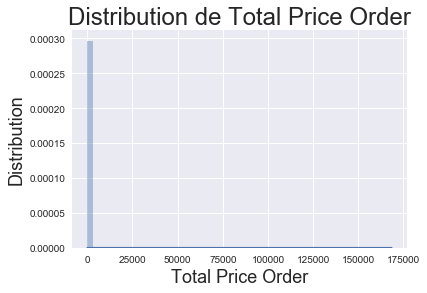

In [31]:
DistriPlot(data.TotalPrice, "Total Price Order")

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64


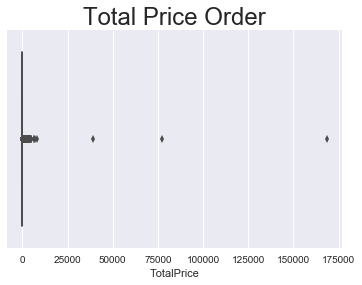

In [32]:
BoxPlot1D(data.TotalPrice, "Total Price Order")

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Poland', 'Japan'],
      dtype='object')


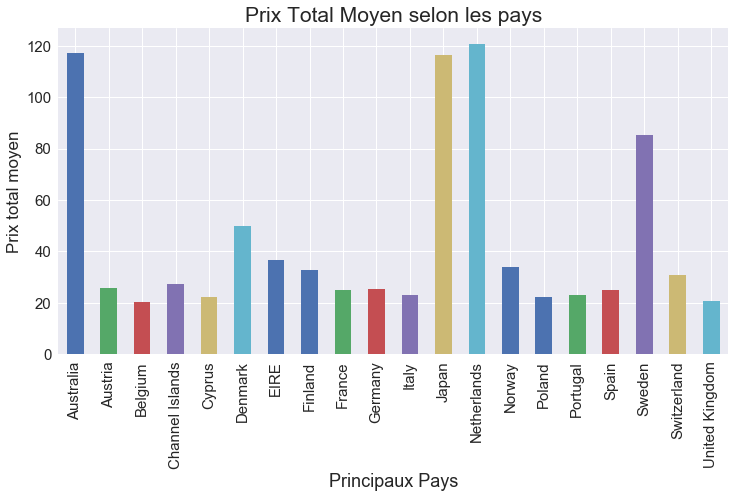

In [33]:
# Visualisation de la moyenne de total price selon les pays

# Récupération de la liste du Top20 pays
Ix20 = data['Country'].value_counts()[0:20].index
Ix20.tolist()
print(Ix20)

# Création du dataframe filtré sur ces pays
df2 = data[data['Country'].isin(Ix20)]
df2.groupby(['Country'])['TotalPrice'].mean().plot(
    kind='bar', figsize=(12, 6), fontsize=15)
plt.title('Prix Total Moyen selon les pays', fontsize=21)
plt.xlabel('Principaux Pays', fontsize=18)
plt.ylabel('Prix total moyen', fontsize=17)
plt.show()

### Création du/des datasets d'analyse 

In [34]:
RFM = data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (NOW - x.max()).days,
     'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)
RFM.rename(columns={'InvoiceDate': 'recency',
                    'InvoiceNo': 'frequency',
                    'TotalPrice': 'monetary_value'}, inplace=True)

RFM.head()

recency  frequency  monetary_value
CustomerID                                    
12346.0         325          1        77183.60
12347.0           2        182         4310.00
12348.0          75         31         1797.24
12349.0          18         73         1757.55
12350.0         310         17          334.40

In [35]:
data2 = data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (NOW - x.max()).days,
     'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum(),
     'Quantity': lambda x: np.mean(x), 'UnitPrice': lambda x: np.mean(x)})

data2['InvoiceDate'] = data2['InvoiceDate'].astype(int)
data2.rename(columns={'InvoiceDate': 'recency',
                      'InvoiceNo': 'frequency',
                      'TotalPrice': 'monetary_value',
                      'Quantity': 'Mean Quantity',
                      'UnitPrice': 'Mean UnitPrice'}, inplace=True)

In [36]:
print(data2.head())
print(data2.shape)

            recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice
CustomerID                                                                   
12346.0         325          1        77183.60   74215.000000        1.040000
12347.0           2        182         4310.00      13.505495        2.644011
12348.0          75         31         1797.24      75.516129        5.764839
12349.0          18         73         1757.55       8.643836        8.289041
12350.0         310         17          334.40      11.588235        3.841176
(4338, 5)


In [37]:
data_std = data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (NOW - x.min()).days,
     'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum(),
     'Quantity': lambda x: np.std(x), 'UnitPrice': lambda x: np.std(x)})

data_std['InvoiceDate'] = data_std['InvoiceDate'].astype(int)
data_std['InvoiceDate'] = 1 + round(data_std['InvoiceDate'] / 30, 1)
data_std.rename(columns={'InvoiceDate': 'Nb_month',
                         'InvoiceNo': 'frequency',
                         'TotalPrice': 'monetary_value',
                         'Quantity': 'Std_Quantity',
                         'UnitPrice': 'Std_UnitPrice'}, inplace=True)

data_std['frequency'] = data_std['frequency'] / data_std['Nb_month']
data_std['monetary_value'] = data_std['monetary_value'] / data_std['Nb_month']

In [38]:
print(data_std.describe())

          Nb_month    frequency  monetary_value  Std_Quantity  Std_UnitPrice
count  4338.000000  4338.000000     4338.000000   4338.000000    4338.000000
mean      8.427801    11.644637      231.261650     24.619600       4.161666
std       3.928795    26.558853      802.922958    581.891499      17.085793
min       1.000000     0.074627        0.344037      0.000000       0.000000
25%       4.700000     2.461825       46.753531      4.684974       1.735905
50%       9.300000     6.163000      105.408267      7.395788       2.565408
75%      11.900000    13.181818      221.738158     12.323781       3.479715
max      13.400000  1161.590909    21891.095313  38180.937757     523.278473


In [39]:
data2['Std_Quantity'] = data_std['Std_Quantity']
data2['Std_UnitPrice'] = data_std['Std_UnitPrice']
data2['frequency'] = data_std['frequency']
data2['monetary_value'] = data_std['monetary_value']

In [40]:
data4 = data2

In [41]:
print(data2.head())
print(data2.describe())

            recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice  \
CustomerID                                                                      
12346.0         325   0.084746     6540.983051   74215.000000        1.040000   
12347.0           2  13.787879      326.515152      13.505495        2.644011   
12348.0          75   2.403101      139.320930      75.516129        5.764839   
12349.0          18  45.625000     1098.468750       8.643836        8.289041   
12350.0         310   1.504425       29.592920      11.588235        3.841176   

            Std_Quantity  Std_UnitPrice  
CustomerID                               
12346.0         0.000000       0.000000  
12347.0        18.804298       2.249176  
12348.0        50.261170      13.182417  
12349.0         6.934863      34.787276  
12350.0         4.215641       9.056039  
           recency    frequency  monetary_value  Mean Quantity  \
count  4338.000000  4338.000000     4338.000000    4338.000000   
mean  

In [42]:
ToDrop = ['Std_Quantity', 'Std_UnitPrice']
data2 = data2.drop(ToDrop, axis=1)
print(data2.head())

            recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice
CustomerID                                                                   
12346.0         325   0.084746     6540.983051   74215.000000        1.040000
12347.0           2  13.787879      326.515152      13.505495        2.644011
12348.0          75   2.403101      139.320930      75.516129        5.764839
12349.0          18  45.625000     1098.468750       8.643836        8.289041
12350.0         310   1.504425       29.592920      11.588235        3.841176


In [43]:
print(data2.describe())

           recency    frequency  monetary_value  Mean Quantity  Mean UnitPrice
count  4338.000000  4338.000000     4338.000000    4338.000000     4338.000000
mean     92.059474    11.644637      231.261650      45.080599        4.470820
std     100.012264    26.558853      802.922958    1203.437983       34.215024
min       0.000000     0.074627        0.344037       1.000000        0.122500
25%      17.000000     2.461825       46.753531       6.042120        2.206415
50%      50.000000     6.163000      105.408267      10.000000        2.917836
75%     141.750000    13.181818      221.738158      14.666667        3.832541
max     373.000000  1161.590909    21891.095313   74215.000000     2033.100000


## Analyse univariée des features

La médiane de  recency est de  50.0
La moyenne de  recency est de  92.05947441217151


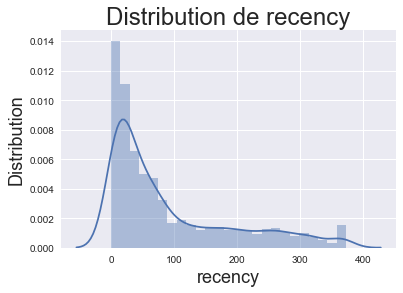

In [44]:
DistriPlot(data2.recency, 'recency')

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: recency, dtype: float64


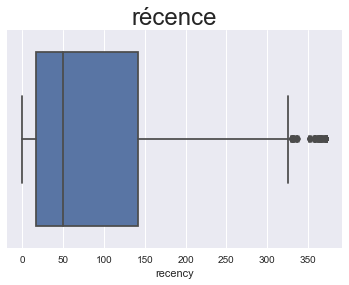

In [45]:
BoxPlot1D(data2['recency'], 'récence')

La médiane de  frequency est de  6.162999861629999
La moyenne de  frequency est de  11.644636898909207


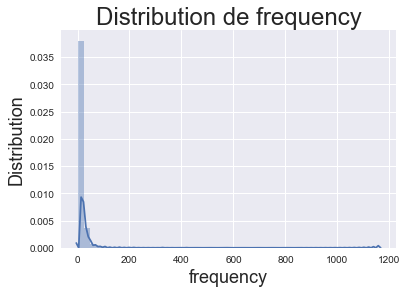

In [46]:
DistriPlot(data2.frequency, 'frequency')

count    4338.000000
mean       11.644637
std        26.558853
min         0.074627
25%         2.461825
50%         6.163000
75%        13.181818
max      1161.590909
Name: frequency, dtype: float64


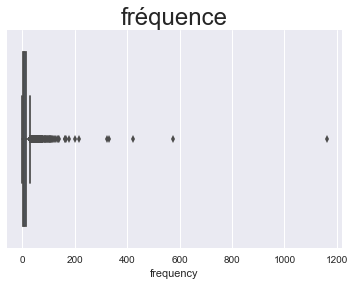

In [47]:
BoxPlot1D(data2['frequency'], 'fréquence')

La médiane de  Quantité moyenne est de  10.0
La moyenne de  Quantité moyenne est de  45.08059918556569


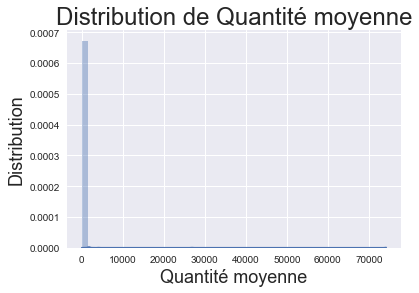

In [48]:
DistriPlot(data2['Mean Quantity'], 'Quantité moyenne')

count     4338.000000
mean        45.080599
std       1203.437983
min          1.000000
25%          6.042120
50%         10.000000
75%         14.666667
max      74215.000000
Name: Mean Quantity, dtype: float64


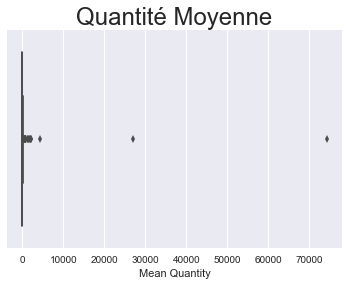

In [49]:
BoxPlot1D(data2['Mean Quantity'], 'Quantité Moyenne')

La médiane de  Prix Unitaire Moyen est de  2.917836257309941
La moyenne de  Prix Unitaire Moyen est de  4.470820318998725


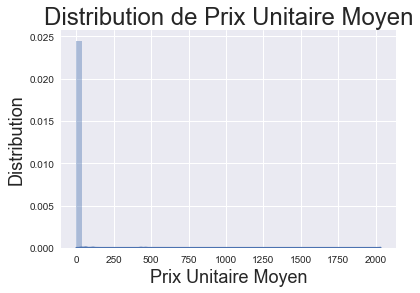

In [50]:
DistriPlot(data2['Mean UnitPrice'], 'Prix Unitaire Moyen')

count    4338.000000
mean        4.470820
std        34.215024
min         0.122500
25%         2.206415
50%         2.917836
75%         3.832541
max      2033.100000
Name: Mean UnitPrice, dtype: float64


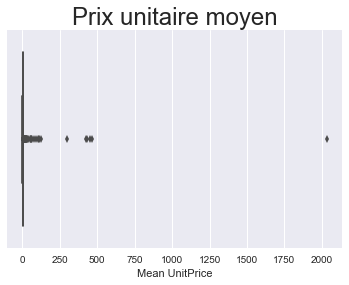

In [51]:
BoxPlot1D(data2['Mean UnitPrice'], 'Prix unitaire moyen')

In [52]:
# Combien de clients expliquent 80% du CA ?
Seuil = 0.8*data_std['monetary_value'].sum()

BigClients = data_std.sort_values(by='monetary_value',
                                  ascending=False).monetary_value.cumsum()
BigClients.head()

BigClients = BigClients < Seuil
Nmax = BigClients.sum()

Ratio = Nmax / data_std.shape[0]
print('les ', 100*round(Ratio, 2),
      '% meilleurs clients représentent plus de 80% du CA Total')

les  34.0 % meilleurs clients représentent plus de 80% du CA Total


In [53]:
# Combien de clients expliquent 80% du CA ?
Seuil = 0.5*data_std['monetary_value'].sum()

BigClients = data_std.sort_values(by='monetary_value',
                                  ascending=False).monetary_value.cumsum()
BigClients.head()

BigClients = BigClients < Seuil
Nmax = BigClients.sum()

Ratio = Nmax / data_std.shape[0]
print('les ', 100*round(Ratio, 2),
      '% meilleurs clients représentent plus de 50% du CA Total')

les  8.0 % meilleurs clients représentent plus de 50% du CA Total


In [54]:
# Analyse des top clients selon les 3 axes

In [55]:
data2.sort_values(by='frequency', ascending=False).head(10)

recency    frequency  monetary_value  Mean Quantity  \
CustomerID                                                        
14096.0           4  1161.590909    14810.179545       3.199374   
17841.0           1   572.835821     3023.868657       2.974726   
14911.0           1   423.134328    10724.714179      14.151675   
12748.0           0   329.253731     2466.655970       5.731414   
13521.0           1   321.538462      824.407692       1.717703   
15993.0           8   217.200000     1111.068000       3.751381   
14606.0           1   199.776119      901.205224       2.311169   
15311.0           0   176.567164     4524.832090      16.122992   
14456.0           5   166.140351      529.347368       3.046463   
16360.0           4   163.076923      884.720513       3.317610   

            Mean UnitPrice  
CustomerID                  
14096.0           6.521708  
17841.0           2.536696  
14911.0           4.612055  
12748.0           2.671874  
13521.0           1.839856  
15993.0           2.241768  
14606.0           2.814789  
15311.0           2.510232  
14456.0           1.771246  
16360.0           2.296289

In [56]:
data2.sort_values(by='recency').head(10)

recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice
CustomerID                                                                   
14441.0           0   5.368421      180.304211       8.745098        5.544118
15694.0           0   5.820896      483.537313      21.500000        4.710769
12680.0           0  10.833333      179.752083       8.519231        3.637885
16954.0           0   4.153846      160.390769      19.518519        3.345000
12713.0           0  38.000000      848.550000      13.368421        2.503421
12433.0           0  31.343284      998.199254      26.359524        2.192738
16558.0           0  34.848485      631.703788      11.689130        3.041196
14051.0           0  15.909091     1182.605303      17.885714        4.660714
17428.0           0  24.661654     1297.507519      28.884146        3.572774
12985.0           0  40.000000      652.305263      20.171053        1.914342

Visualisation des 10 plus gros acheteurs (en valeur)

In [57]:
data2.sort_values(by='monetary_value', ascending=False).head(10)

recency    frequency  monetary_value  Mean Quantity  \
CustomerID                                                        
14646.0           1   162.187500    21891.095313      94.853083   
16446.0           0     0.384615    21599.038462   26999.000000   
18102.0           0    32.651515    19671.007576     148.779582   
14096.0           4  1161.590909    14810.179545       3.199374   
17450.0           8    25.454545    14726.575000     208.252976   
16000.0           2     8.181818    11267.000000     567.777778   
14911.0           1   423.134328    10724.714179      14.151675   
12415.0          24    58.524590    10238.895902     108.366947   
14156.0           9   104.104478     8747.020896      41.410753   
17511.0           2    71.865672     6795.700000      67.029076   

            Mean UnitPrice  
CustomerID                  
14646.0           2.493300  
16446.0           1.660000  
18102.0           4.503295  
14096.0           6.521708  
17450.0           3.378929  
16000.0           3.345556  
14911.0           4.612055  
12415.0           2.937087  
14156.0           3.834215  
17511.0           2.306625

# Création de la table avec quantile

In [58]:
quantiles = data2.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [59]:
data_quant = data2

In [60]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [61]:
data_quant['r_quartile'] = data_quant['recency'].apply(
    RScore, args=('recency', quantiles))

data_quant['f_quartile'] = data_quant['frequency'].apply(
    FMScore, args=('frequency', quantiles))

data_quant['m_quartile'] = data_quant['monetary_value'].apply(
    FMScore, args=('monetary_value', quantiles))

data_quant['q_quartile'] = data_quant['Mean Quantity'].apply(
    FMScore, args=('Mean Quantity', quantiles))

data_quant['pu_quartile'] = data_quant['Mean UnitPrice'].apply(
    FMScore, args=('Mean UnitPrice', quantiles))

data_quant.head()

recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice  \
CustomerID                                                                      
12346.0         325   0.084746     6540.983051   74215.000000        1.040000   
12347.0           2  13.787879      326.515152      13.505495        2.644011   
12348.0          75   2.403101      139.320930      75.516129        5.764839   
12349.0          18  45.625000     1098.468750       8.643836        8.289041   
12350.0         310   1.504425       29.592920      11.588235        3.841176   

            r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile  
CustomerID                                                               
12346.0              4           4           1           1            4  
12347.0              1           1           1           2            3  
12348.0              3           4           2           1            1  
12349.0              2           1           1           3            1  
12350.0              4           4           4           2            1

## Outliers

In [62]:
from sklearn.neighbors import LocalOutlierFactor
LOF = LocalOutlierFactor()
#LOF.fit(data2)
LOF_score = LOF.fit_predict(data2)
LOF_outlier = np.where(LOF.fit_predict(data2) == -1)

In [63]:
print(np.bincount(LOF_score + 1)[0])

434


In [64]:
# On décompte 434 outliers avec la méthode LOF 
print(np.array(LOF_outlier).shape)
LOF_d = np.array(LOF_outlier).tolist()
#LOF_d
data_del = data2

(1, 434)


In [65]:
print(data2.shape)
data2['LOF_score'] = LOF.fit_predict(data2)
data2 = data2[data2['LOF_score'] == 1]
print(data2.shape)

(4338, 10)
(3904, 11)


In [66]:
data_del = data_del[data_del['LOF_score'] == -1]
Sum_outlier = data_del['monetary_value'].sum()
#print(Sum_outlier)
print(round(100 * Sum_outlier / RFM['monetary_value'].sum(), 3))

print(100 * data_del.shape[0] / RFM.shape[0])

3.081
10.004610419548179


In [67]:
data2 = data2.drop(['LOF_score'], axis=1)

### Suppression des colonnes superflues dans chaque data set

In [68]:
# data2
ToDrop = ['r_quartile', 'f_quartile',
          'm_quartile', 'q_quartile', 'pu_quartile']
data2 = data2.drop(ToDrop, axis=1)

In [69]:
# data_quant
ToDrop = ['LOF_score', 'recency', 'frequency', 'monetary_value',
          'Mean Quantity', 'Mean UnitPrice']
data_quant = data_quant.drop(ToDrop, axis=1)

# Export des data sets

In [70]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

In [71]:
data2.head()

recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice
CustomerID                                                                   
12347.0           2  13.787879      326.515152      13.505495        2.644011
12349.0          18  45.625000     1098.468750       8.643836        8.289041
12350.0         310   1.504425       29.592920      11.588235        3.841176
12352.0          36   7.798165      229.911927       6.305882       15.930706
12353.0         204   0.512821       11.410256       5.000000        6.075000

In [72]:
data_quant.head()

r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile
CustomerID                                                             
12346.0              4           4           1           1            4
12347.0              1           1           1           2            3
12348.0              3           4           2           1            1
12349.0              2           1           1           3            1
12350.0              4           4           4           2            1

In [73]:
# Data set traité, mais avec toutes les colonnes initiales, non regroupé par clients.
data.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_original.csv')

In [74]:
# data set RFM + Infos sur quantité et prix unitaire
data2.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_clean.csv')

In [75]:
# Quartiles des features du jeu de données principal
data_quant.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_quant.csv')

### Jeux de données sans recency 

In [76]:
data2_wr = data2.drop(['recency'], axis=1)
data2_wr.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data2_wr.csv')

In [77]:
dataquant_wr = data_quant.drop(['r_quartile'], axis=1)
dataquant_wr.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/dataquant_wr.csv')

### Jeu de données avec mean + std 

In [91]:
data4.head()

recency  frequency  monetary_value  Mean Quantity  Mean UnitPrice  \
CustomerID                                                                      
12346.0         325   0.084746     6540.983051   74215.000000        1.040000   
12347.0           2  13.787879      326.515152      13.505495        2.644011   
12348.0          75   2.403101      139.320930      75.516129        5.764839   
12349.0          18  45.625000     1098.468750       8.643836        8.289041   
12350.0         310   1.504425       29.592920      11.588235        3.841176   

            Std_Quantity  Std_UnitPrice  
CustomerID                               
12346.0         0.000000       0.000000  
12347.0        18.804298       2.249176  
12348.0        50.261170      13.182417  
12349.0         6.934863      34.787276  
12350.0         4.215641       9.056039

In [78]:
data4.to_csv(
    path_or_buf='C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_std.csv')

# Partition du jeu de données en fonction de la date pour étude de la temporalité

In [79]:
data_temp = pd.read_excel("Online Retail.xlsx")

In [80]:
Split = dt.datetime(2011, 8, 1)

data_temp = data_temp.drop_duplicates()
data_temp = data_temp.dropna(subset=['CustomerID'])
data_temp = data_temp[(data_temp['Quantity'] > 0)]
data_temp = data_temp[(data_temp['UnitPrice'] > 0)]
data_temp['InvoiceDate'] = pd.to_datetime(data_temp['InvoiceDate'])
data_temp['TotalPrice'] = data_temp['Quantity'] * data_temp['UnitPrice']
data_FH = data_temp[(data_temp['InvoiceDate'] < Split)]
data_SH = data_temp[(data_temp['InvoiceDate'] > Split)]

In [81]:
print(data_temp.shape)
print(data_FH.shape)
print(data_SH.shape)

(392692, 9)
(197246, 9)
(195446, 9)


In [82]:
data_FH = data_FH.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (NOW - x.min()).days,
     'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum(),
     'Quantity': lambda x: np.mean(x), 'UnitPrice': lambda x: np.mean(x)})

data_FH['InvoiceDate'] = data_FH['InvoiceDate'].astype(int)
data_FH['InvoiceDate'] = 1 + round(data_FH['InvoiceDate'] / 30, 1)
data_FH.rename(columns={'InvoiceDate': 'Nb_month',
                        'InvoiceNo': 'frequency',
                        'TotalPrice': 'monetary_value',
                        'Quantity': 'Mean_Quantity',
                        'UnitPrice': 'Mean_UnitPrice'}, inplace=True)

data_FH['frequency'] = data_FH['frequency'] / data_FH['Nb_month']
data_FH['monetary_value'] = data_FH['monetary_value'] / data_FH['Nb_month']
data_FH = data_FH.drop('Nb_month', axis=1)

In [83]:
print(data_FH.shape)
data_FH.head()

(3148, 4)


frequency  monetary_value  Mean_Quantity  Mean_UnitPrice
CustomerID                                                          
12346.0      0.084746     6540.983051   74215.000000        1.040000
12347.0      7.727273      167.117424      12.872549        2.732059
12348.0      2.170543      115.289922      75.857143        4.864643
12350.0      1.504425       29.592920      11.588235        3.841176
12352.0      3.486239      143.285321       6.684211       27.449474

In [84]:
data_SH = data_temp.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (NOW - x.min()).days,
     'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum(),
     'Quantity': lambda x: np.mean(x), 'UnitPrice': lambda x: np.mean(x)})

data_SH['InvoiceDate'] = data_SH['InvoiceDate'].astype(int)
data_SH['InvoiceDate'] = 1 + round(data_SH['InvoiceDate'] / 30, 1)
data_SH.rename(columns={'InvoiceDate': 'Nb_month',
                        'InvoiceNo': 'frequency',
                        'TotalPrice': 'monetary_value',
                        'Quantity': 'Mean_Quantity',
                        'UnitPrice': 'Mean_UnitPrice'}, inplace=True)

data_SH['frequency'] = data_SH['frequency'] / data_SH['Nb_month']
data_SH['monetary_value'] = data_SH['monetary_value'] / data_SH['Nb_month']
data_SH = data_SH.drop('Nb_month', axis=1)

In [85]:
print(data_SH.shape)
data_SH.head()

(4338, 4)


frequency  monetary_value  Mean_Quantity  Mean_UnitPrice
CustomerID                                                          
12346.0      0.084746     6540.983051   74215.000000        1.040000
12347.0     13.787879      326.515152      13.505495        2.644011
12348.0      2.403101      139.320930      75.516129        5.764839
12349.0     45.625000     1098.468750       8.643836        8.289041
12350.0      1.504425       29.592920      11.588235        3.841176

### Outliers

In [86]:
LOF2 = LocalOutlierFactor()
LOF2.fit(data_FH)
data_FH['LOF_score'] = LOF2.fit_predict(data_FH)
data_FH = data_FH[data_FH['LOF_score'] == 1]
data_FH = data_FH.drop(['LOF_score'], axis=1)

In [87]:
LOF3 = LocalOutlierFactor()
LOF3.fit(data_SH)
data_SH['LOF_score'] = LOF3.fit_predict(data_SH)
data_SH = data_SH[data_SH['LOF_score'] == 1]
data_SH = data_SH.drop(['LOF_score'], axis=1)

In [88]:
print(data_FH.shape)
print(data_SH.shape)

(2833, 4)
(3904, 4)


In [89]:
data_FH.to_csv(path_or_buf = 'C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_FH.csv')

In [90]:
data_SH.to_csv(path_or_buf = 'C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project/data_SH.csv')